In [4]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("HP_engine.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
110,Volvo,240,1993,regular unleaded,114.0,4.0,MANUAL,rear wheel drive,4.0,Luxury,Midsize,Sedan,26,19,870,2000
7891,Maserati,Quattroporte,2016,premium unleaded (required),404.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Sedan,23,16,238,99900
2400,Volkswagen,CC,2015,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,31,22,873,35375
10683,Ford,Transit Connect,2017,flex-fuel (unleaded/E85),169.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Passenger Minivan,27,19,5657,25590
11316,Buick,Verano,2016,regular unleaded,180.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,32,21,155,26505


<AxesSubplot:xlabel='Number of Doors'>

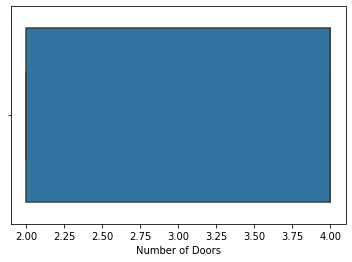

In [5]:
# No outliers
sns.boxplot(x=df['Number of Doors'])

<AxesSubplot:xlabel='Engine HP'>

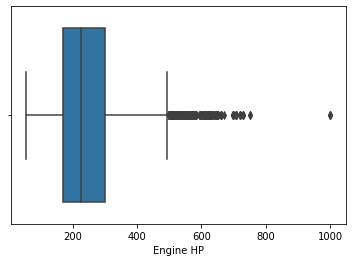

In [6]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [7]:
import numpy as np 

s = [1, 3,3,3,3,3,3,3,3,3,3,3.5,4,4,4,4,4,4,4,4,4,4,5,5,5,5]
s_a = np.asarray(s)


media = s_a.mean()
std = s_a.std()

print("media:", s_a.mean())
print("std:", s_a.std())


media: 3.6346153846153846
std: 0.8721954208037359


In [8]:
diferencia = abs(media - 1)
print("Diferencia con respecto a la media:\n", diferencia)

Diferencia con respecto a la media:
 2.6346153846153846


In [38]:
s_a

array([1. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3.5, 4. ,
       4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 5. , 5. , 5. , 5. ])

<AxesSubplot:>

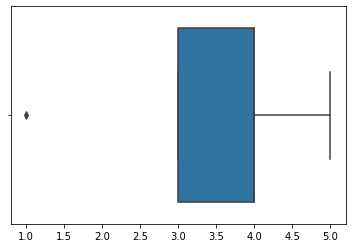

In [9]:
sns.boxplot(x=s_a) # Cada uno de los limites representa el quartil 1(más cerca del mínimo) y el quartil 2(más cerca del máximo)

<AxesSubplot:xlabel='Engine HP'>

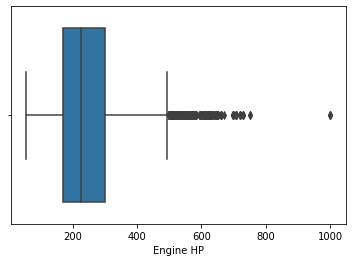

In [10]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [11]:
df["Engine HP"].quantile(0.25)

170.0

In [12]:
df["Engine HP"].quantile(0.75)

300.0

In [13]:
df["Popularity"].max()

5657

In [14]:
df["Popularity"].quantile(1)

5657.0

In [15]:
df["Popularity"].min()

2

In [16]:
df["Popularity"].quantile(0)

2.0

In [17]:
df["Popularity"].quantile(0.75)

2009.0

In [18]:
df["Popularity"].quantile(0.5)

1385.0

In [19]:
df["Popularity"].median()

1385.0

<AxesSubplot:xlabel='Popularity'>

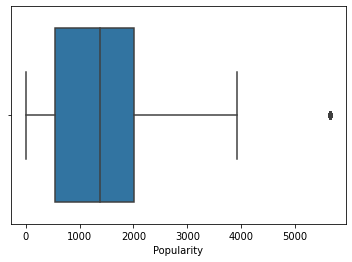

In [20]:
sns.boxplot(x=df['Popularity']) # NO es una, pero destaca 

In [21]:
df.quantile(0.25) # Viendo el quartil 25 de todas las columnas

Year                 2007.0
Engine HP             170.0
Engine Cylinders        4.0
Number of Doors         2.0
highway MPG            22.0
city mpg               16.0
Popularity            549.0
MSRP                21000.0
Name: 0.25, dtype: float64

In [22]:
df.quantile(0.75) 

Year                 2016.00
Engine HP             300.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            30.00
city mpg               22.00
Popularity           2009.00
MSRP                42231.25
Name: 0.75, dtype: float64

In [23]:
# Hard technique: calculamos para todas las columnas el IQR 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64

In [24]:
df.shape

(11914, 16)

In [25]:
IQR * 1.5

Year                   13.500
Engine HP             195.000
Engine Cylinders        3.000
Number of Doors         3.000
highway MPG            12.000
city mpg                9.000
Popularity           2190.000
MSRP                31846.875
dtype: float64

In [26]:
# Límite superior antes de outlier
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [27]:
# Límite inferior antes de outlier
(Q1 - (1.5 * IQR))

Year                 1993.500
Engine HP             -25.000
Engine Cylinders        1.000
Number of Doors        -1.000
highway MPG            10.000
city mpg                7.000
Popularity          -1641.000
MSRP               -10846.875
dtype: float64

<AxesSubplot:xlabel='Engine HP'>

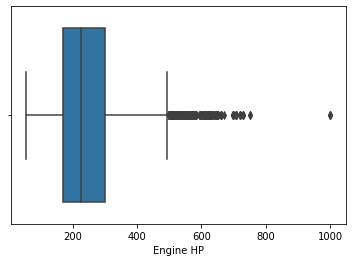

In [28]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [29]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [39]:
limite_inferior

Year                 1993.500
Engine HP             -25.000
Engine Cylinders        1.000
Number of Doors        -1.000
highway MPG            10.000
city mpg                7.000
Popularity          -1641.000
MSRP               -10846.875
dtype: float64

valor max para engine HP 1001.0
ipykernel_launcher:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
ipykernel_launcher:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


<AxesSubplot:xlabel='Engine HP'>

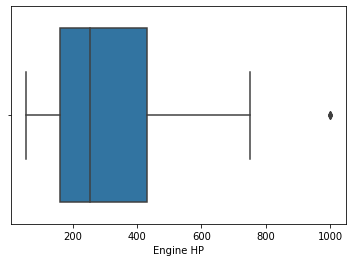

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR_RIC = Q3 - Q1
limite_inferior = (Q1 - 1.5 * IQR_RIC)
limite_superior = (Q3 + 1.5 * IQR_RIC)

# Get the real rows 
# Esto está cogiendo todos los valores que están dentro de los límites superior e inferior del boxplot que representan outliers
df2 = df[((df < limite_inferior) | (df > limite_superior)).any(axis=1)]
# Valores que están fuera del rango --> Los outliers
print("valor max para engine HP", df2['Engine HP'].quantile(1))
sns.boxplot(x=df2['Engine HP'])

In [ ]:
# Get the real rows 
# Esto está cogiendo todos los valores que están dentro de los límites superior e inferior del boxplot que representan outliers
df2 = df[((df < limite_inferior) | (df > limite_superior)).any(axis=1)]
# Valores que están fuera del rango --> Los outliers
print("valor max para engine HP", df2['Engine HP'].quantile(1))
sns.boxplot(x=df2['Engine HP'])

In [31]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [32]:
#~ --> altGr + 4 y espacio
#| --> altGr + 1
# RPA: 

In [40]:
# Get the opposite --> Valores que no son outliers
df_no_no_outlyer = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2.shape)
df3.shape

(2830, 16)
ipykernel_launcher:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
ipykernel_launcher:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


(9084, 16)

In [34]:
df3['Engine HP'].min()

66.0

<AxesSubplot:xlabel='Engine HP'>

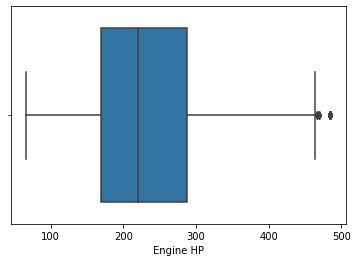

In [35]:
sns.boxplot(x=df3['Engine HP'])

Year                 2016.0
Engine HP             430.0
Engine Cylinders        8.0
Number of Doors         4.0
highway MPG            28.0
city mpg               20.0
Popularity           5657.0
MSRP                93200.0
Name: 0.75, dtype: float64

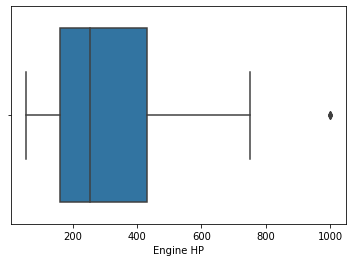

In [36]:
# Outliers After
sns.boxplot(x=df2['Engine HP'])

df2.quantile(0.75)

In [37]:
df.quantile(1)

Year                   2017.0
Engine HP              1001.0
Engine Cylinders         16.0
Number of Doors           4.0
highway MPG             354.0
city mpg                137.0
Popularity             5657.0
MSRP                2065902.0
Name: 1, dtype: float64